# AnalyzeEDGBWaveforms.ipynb

Maria Okounkova (mokounkova@pasadena.edu)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

### Helper functions

Functions for computing and subtracting peak times

In [2]:
def GetPeakTime(time, data): 
    """ Grab the peak time of some data """
    t_peak = time[np.argmax(data)]
    return t_peak

def SubtractPeakTime(time, data): 
    """ Subtract the peak time of some data """
    t_peak = GetPeakTime(time, data)
    return time - t_peak

### Read in the waveforms

In [12]:
## Read in the extrapolated modes
def ReadWaveformModes(file, mode_l = '2', mode_m = '2'):
    """ 
        File is the file containing the extrapolated waveform that we want to read in 
        mode_l is the l spin-weighted spherical harmonic mode of the waveform that we would like (default l = 2), 
        and mode_m is the m spin-weighted spherical harmonic mode that we would like (default m = 2)
    """

    ## Read in the data
    f = h5py.File(file, 'r')
    
    ## grab the length of the waveform first
    data = f['Extrapolated_N2.dir']['Y_l' + mode_l + '_m' + mode_m + '.dat']
    time = np.array(data[:,0])
    
    ## Real and imaginary parts of the waveform
    data_real = np.array(data[:,1])
    data_imag = np.array(data[:,2])
    
    ## Now subtract off the peak time
    amp = np.sqrt(data_real**2 + data_imag**2)
    time = time - time[np.argmax(amp)]

    return time, data_real, data_imag
    

### Plot the waveforms we want

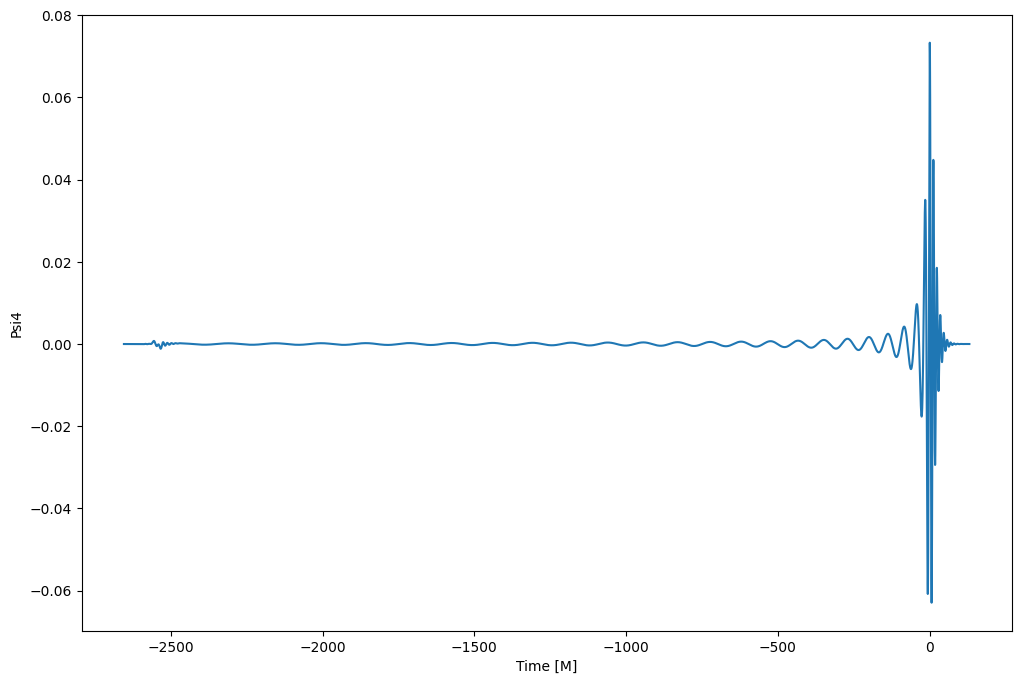

In [13]:
plt.figure(figsize=(12, 8))

## Edit to include the file that you want
time, data_real, data_imag = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p0.h5')
    
plt.plot(time, data_real) 

plt.xlabel('Time [M]')
plt.ylabel('Psi4')
plt.show()